In [1]:
import numpy as np
import pandas as pd

In [2]:
train_df=pd.read_csv('./happiness_train_abbr.csv',index_col=0)
test_df=pd.read_csv('./happiness_test_abbr.csv',index_col=0)

In [3]:
train_df.head()

,happiness,survey_type,province,city,county,survey_time,gender,birth,nationality,religion,...,family_income,family_m,family_status,house,car,marital,status_peer,status_3_before,view,inc_ability
id,,,,,,,,,,,,,,,,,,,,,
1,4,1,12,32,59,2015/8/4 14:18,1,1959,1,1,...,60000.0,2,2,1,2,3,3,2,4,3
2,4,2,18,52,85,2015/7/21 15:04,1,1992,1,1,...,40000.0,3,4,1,2,1,1,1,4,2
3,4,2,29,83,126,2015/7/21 13:24,2,1967,1,0,...,8000.0,3,3,1,2,3,2,1,4,2
4,5,2,10,28,51,2015/7/25 17:33,2,1943,1,1,...,12000.0,3,3,1,1,7,2,1,3,2
5,4,1,7,18,36,2015/8/10 9:50,2,1994,1,1,...,-2.0,4,3,1,1,1,3,2,3,-8


In [4]:
test_df.head()

,survey_type,province,city,county,survey_time,gender,birth,nationality,religion,religion_freq,...,family_income,family_m,family_status,house,car,marital,status_peer,status_3_before,view,inc_ability
id,,,,,,,,,,,,,,,,,,,,,
8001,1,2,2,9,2015/7/24 10:30,2,1972,8,0,1,...,-2,5,3,1,2,3,3,1,4,2
8002,1,22,66,106,2015/7/12 15:38,2,1938,1,1,1,...,20000,1,1,2,2,7,3,3,4,2
8003,2,9,22,44,2015/7/5 9:36,2,1935,1,1,1,...,-2,1,2,1,2,7,3,1,3,4
8004,2,18,52,86,2015/7/19 10:10,2,1992,1,1,1,...,100000,2,4,1,2,3,2,1,3,2
8005,2,24,70,110,2015/8/3 11:41,1,1990,1,1,2,...,30000,3,2,1,2,1,2,2,5,2


In [5]:
train_df.describe()
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2968 entries, 8001 to 10968
Data columns (total 40 columns):
survey_type        2968 non-null int64
province           2968 non-null int64
city               2968 non-null int64
county             2968 non-null int64
survey_time        2968 non-null object
gender             2968 non-null int64
birth              2968 non-null int64
nationality        2968 non-null int64
religion           2968 non-null int64
religion_freq      2968 non-null int64
edu                2968 non-null int64
income             2968 non-null int64
political          2968 non-null int64
floor_area         2968 non-null float64
height_cm          2968 non-null int64
weight_jin         2968 non-null int64
health             2968 non-null int64
health_problem     2968 non-null int64
depression         2968 non-null int64
hukou              2968 non-null int64
socialize          2968 non-null int64
relax              2968 non-null int64
learn              2968 non-

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000198802441D0>]],
      dtype=object)

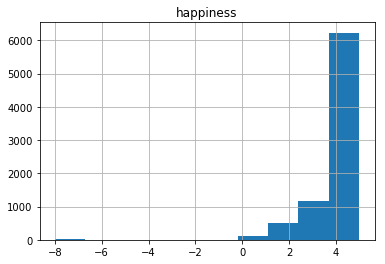

In [43]:
%matplotlib inline
happiness=pd.DataFrame({'happiness':train_df['happiness']})
happiness.hist()#从下图看出y值的严重不均衡问题

In [44]:
y_train=train_df.pop('happiness')#去掉y
#把剩余的合并
all_df=pd.concat((train_df,test_df),axis=0)
#删除调查日期列，认为调查日期不影响最后的测评
all_df.pop('survey_time')
all_df.shape

(10968, 39)

In [45]:
y_train.head()

id
1    4
2    4
3    4
4    5
5    4
Name: happiness, dtype: int64

In [46]:
str_addr_list=['survey_type','province','city','county', 'gender','birth','nationality',
'religion',
'religion_freq',
'edu',
'political',
'health',
'health_problem',
'depression',
'hukou',
'socialize',
'relax',
'learn',
'equity',
'class',
'work_exper',
'work_status',
'work_type',
'work_manage',
'family_m',
'family_status',
'car',
'marital',
'status_peer',
'status_3_before',
'view',
'inc_ability']
all_df[str_addr_list].dtypes

survey_type          int64
province             int64
city                 int64
county               int64
gender               int64
birth                int64
nationality          int64
religion             int64
religion_freq        int64
edu                  int64
political            int64
health               int64
health_problem       int64
depression           int64
hukou                int64
socialize            int64
relax                int64
learn                int64
equity               int64
class                int64
work_exper           int64
work_status        float64
work_type          float64
work_manage        float64
family_m             int64
family_status        int64
car                  int64
marital              int64
status_peer          int64
status_3_before      int64
view                 int64
inc_ability          int64
dtype: object

In [47]:
all_df[str_addr_list]=all_df[str_addr_list].astype(str)
all_df[str_addr_list].dtypes
all_df['health'].value_counts()

4     4257
3     2379
5     2359
2     1617
1      349
-8       7
Name: health, dtype: int64

In [35]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10968 entries, 1 to 10968
Data columns (total 40 columns):
survey_type        10968 non-null object
province           10968 non-null object
city               10968 non-null object
county             10968 non-null object
survey_time        10968 non-null object
gender             10968 non-null object
birth              10968 non-null object
nationality        10968 non-null object
religion           10968 non-null object
religion_freq      10968 non-null object
edu                10968 non-null object
income             10968 non-null int64
political          10968 non-null object
floor_area         10968 non-null float64
height_cm          10968 non-null int64
weight_jin         10968 non-null int64
health             10968 non-null object
health_problem     10968 non-null object
depression         10968 non-null object
hukou              10968 non-null object
socialize          10968 non-null object
relax              10968 non-nul

In [48]:
all_dummy_df=pd.get_dummies(all_df)
all_dummy_df.head()

,income,floor_area,height_cm,weight_jin,work_yr,family_income,house,survey_type_1,survey_type_2,province_1,...,view_1,view_2,view_3,view_4,view_5,inc_ability_-8,inc_ability_1,inc_ability_2,inc_ability_3,inc_ability_4
id,,,,,,,,,,,,,,,,,,,,,
1,20000,45.0,176,155,30.0,60000.0,1,1,0,0,...,0,0,0,1,0,0,0,0,1,0
2,20000,110.0,170,110,2.0,40000.0,1,0,1,0,...,0,0,0,1,0,0,0,1,0,0
3,2000,120.0,160,122,NaN,8000.0,1,0,1,0,...,0,0,0,1,0,0,0,1,0,0
4,6420,78.0,163,170,NaN,12000.0,1,0,1,0,...,0,0,1,0,0,0,0,1,0,0
5,-1,70.0,165,110,NaN,-2.0,1,1,0,0,...,0,0,1,0,0,1,0,0,0,0


In [52]:
all_dummy_df.isnull().sum().sort_values(ascending=False).head(10)

work_yr          6939
family_income       1
inc_ability_4       0
county_20           0
county_25           0
county_24           0
county_23           0
county_22           0
county_21           0
county_19           0
dtype: int64

Index(['income', 'floor_area', 'height_cm', 'weight_jin', 'work_yr',
       'family_income', 'house', 'survey_type_1', 'survey_type_2',
       'province_1',
       ...
       'view_1', 'view_2', 'view_3', 'view_4', 'view_5', 'inc_ability_-8',
       'inc_ability_1', 'inc_ability_2', 'inc_ability_3', 'inc_ability_4'],
      dtype='object', length=513)


In [53]:
means_cols=all_dummy_df.mean()
means_cols.head(10)

income           30995.670222
floor_area         115.983901
height_cm          163.905361
weight_jin         121.370988
work_yr             14.447009
family_income    66321.103219
house                1.068381
survey_type_1        0.589898
survey_type_2        0.410102
province_1           0.045770
dtype: float64

In [54]:
all_dummy_df=all_dummy_df.fillna(means_cols)


In [57]:
all_dummy_df.isnull().sum().sum()#查看是否还有空缺值

0

In [59]:
dummy_train_df=all_dummy_df.loc[train_df.index]
dummy_test_df=all_dummy_df.loc[test_df.index]
dummy_train_df.shape,dummy_test_df.shape

((8000, 513), (2968, 513))

In [62]:
from sklearn.svm import LinearSVC 
from sklearn.model_selection import cross_val_score

In [69]:
X_train=dummy_train_df.values
X_test=dummy_test_df.values


In [72]:
C=np.arange(0,2,0.1)+0.1
print(C)
test_scores=[]
for c in C:
    clf=LinearSVC(C=c)
    test_score=np.sqrt(-cross_val_score(clf,X_train,y_train,cv=10,scoring='neg_mean_squared_error'))
    test_scores.append(np.mean(test_score))


[0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8
 1.9 2. ]


[3.402793419601226, 1.8298451851010433, 2.966877274873627, 1.5710244280046788, 2.2142944709700143, 2.7997964860812954, 1.5506433145492307, 1.4810836069837872, 2.979425869959756, 2.071605656050879, 2.733280809315879, 2.847279470456917, 1.7147132151692897, 2.4898858935532457, 2.8601835267673636, 4.967379658071399, 2.5245703384383757, 1.702102610142924, 2.9523772373501265, 2.49747857199715]


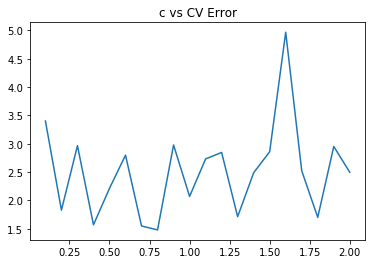

In [74]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(C,test_scores)
plt.title("c vs CV Error")
print(test_scores)

In [75]:
#c=0.8最低，然后用c=0.8来调其他参数
CV=np.arange(3,10,1)
test_scores=[]
for cv in CV:
    clf=LinearSVC(C=0.8)
    test_score=np.sqrt(-cross_val_score(clf,X_train,y_train,cv=cv,scoring='neg_mean_squared_error'))
    test_scores.append(np.mean(test_score))


[3.4892367485744535, 1.5592037698092898, 1.8927165465132532, 2.829141255210757, 2.975816144412338, 1.5108546609985358, 2.8747620331197026]


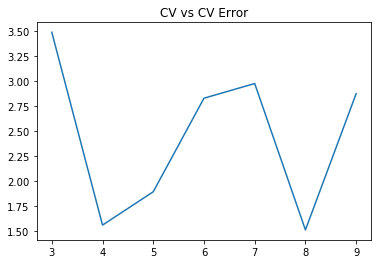

In [76]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(CV,test_scores)
plt.title("CV vs CV Error")
print(test_scores)

In [77]:
#从上面可以看出cv=8时是最好的




In [78]:
#试一下随机深林

from sklearn.ensemble import RandomForestClassifier
max_features=np.arange(0.1,1.0,0.1)
test_score=[]
for max in max_features:
    clf=RandomForestClassifier(n_estimators=200,max_features=max)
    test_score=np.sqrt(-cross_val_score(clf,X_train,y_train,cv=8,scoring='neg_mean_squared_error'))
    test_scores.append(np.mean(test_score))



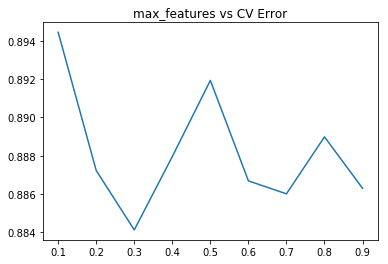

In [81]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(max_features,test_scores[7:])
plt.title("max_features vs CV Error")
# print(test_scores)

In [82]:
#从上图可以看出30% 的特征取得了最低的效果
#我们在使用树的棵数来试试
n_estimators=np.arange(200,1500,100)
test_scores=[]
for n_estimator in n_estimators:
    clf=RandomForestClassifier(n_estimators=n_estimator,max_features=0.3)
    test_score=np.sqrt(-cross_val_score(clf,X_train,y_train,cv=cv,scoring='neg_mean_squared_error'))
    test_scores.append(np.mean(test_score))

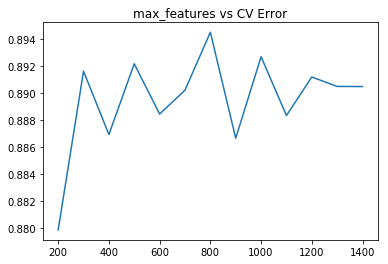

In [83]:
plt.plot(n_estimators,test_scores)
plt.title("max_features vs CV Error")

In [84]:
#现在我们来做一下集成  太慢，运行不出来
from sklearn.ensemble import BaggingClassifier
test_scores=[]
params = [1, 10, 15, 20, 25, 30, 40]#小分类器的个数
for param in params:
    clf = BaggingClassifier(n_estimators=param, base_estimator=RandomForestClassifier(n_estimators=200,max_features=0.3))
    test_score = np.sqrt(-cross_val_score(clf, X_train, y_train, cv=10, scoring='neg_mean_squared_error'))
    test_scores.append(np.mean(test_score))


KeyboardInterrupt: 

In [90]:
from xgboost import XGBClassifier#默认使用决策树算法DT
test_scores = []
params = [8,9,10,11,12,13,14]
for param in params:
    clf = XGBClassifier(max_depth=param)
    test_score = np.sqrt(-cross_val_score(clf, X_train, y_train, cv=10, scoring='neg_mean_squared_error'))
    test_scores.append(np.mean(test_score))

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:171: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:171: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:171: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:171: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but i

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:171: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:171: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:171: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:171: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but i

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:171: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:171: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:171: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:171: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but i

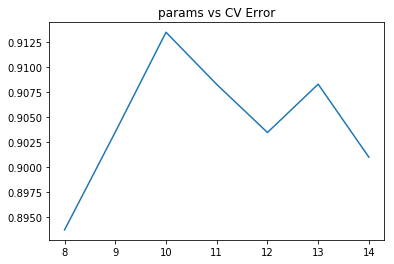

In [91]:
plt.plot(params,test_scores)
plt.title("params vs CV Error")

In [92]:
print(test_scores)#这个结果还没有上次优

[0.8937029162340941, 0.9034960417934815, 0.9134951258750263, 0.9082731069077559, 0.9034567528010073, 0.9082953408607128, 0.900980901685154]


In [93]:
xgb1 = XGBClassifier(
 learning_rate =0.1,
 n_estimators=1000,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)
test_score = np.sqrt(-cross_val_score(xgb1, X_train, y_train, cv=10, scoring='neg_mean_squared_error'))
print(test_score)

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:171: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:171: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:171: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:171: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but i

[0.98238856 0.91673279 0.79715474 0.98680432 0.85220303 1.0006248
 0.86674679 0.85126718 0.89274435 0.89049068]


D:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:171: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [94]:
print(np.mean(test_score))

0.9037157251653619


In [ ]:
np.square(2)

In [ ]:
#下面采用网格搜索最优值
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import make_scorer
def loss(y_true, y_predict):
    np.mean(np.square(y_true-y_predict))
param_test1 = {
 'max_depth':[3,5,7,9],
 'min_child_weight':[1,3,4,5,6]
}
gsearch1 = GridSearchCV(estimator = XGBClassifier(learning_rate =0.1, n_estimators=140, max_depth=5,
min_child_weight=1, gamma=0, subsample=0.8,colsample_bytree=0.8,
objective= 'binary:logistic', scale_pos_weight=1, seed=27), 
param_grid = param_test1,     scoring=loss,n_jobs=-1,iid=False, cv=5)
gsearch1.fit(X_train,y_train)
gsearch1.grid_scores_, gsearch1.best_params_,     gsearch1.best_score_